In [ ]:
import csv
from datetime import datetime

# Sample data for expenses
expenses = [
    {"Date": "2025-01-06", "Category": "Groceries", "Description": "Supermarket shopping", "Amount": 50.75},
    {"Date": "2025-01-07", "Category": "Utilities", "Description": "Electric bill", "Amount": 120.40},
    {"Date": "2025-01-08", "Category": "Transportation", "Description": "Bus pass", "Amount": 30.00},
    {"Date": "2025-01-09", "Category": "Entertainment", "Description": "Movie tickets", "Amount": 25.00},
    {"Date": "2025-01-10", "Category": "Dining", "Description": "Restaurant dinner", "Amount": 75.50},
]

# Define the header for the CSV
header = ["Date", "Category", "Description", "Amount"]

# Write the data to a CSV file
with open("/content/2_Personal_Fitness_Tracker.csv ", mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=header)

    # Write the header
    writer.writeheader()

    # Write the expense records
    writer.writerows(expenses)

print("Expense records have been successfully written to 'expenses.csv'.")


Expense records have been successfully written to 'expenses.csv'.


In [ ]:
#load and manipulate the data
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/2_Personal_Fitness_Tracker.csv ")

# Display the first few rows of the DataFrame to confirm the data is loaded correctly
print("Data Loaded:")
print(df.head())

# Example manipulations:

# 1. Filter the data for expenses in the 'Dining' category
dining_expenses = df[df['Category'] == 'Dining']
print("\nDining Expenses:")
print(dining_expenses)

# 2. Calculate the total amount of expenses
total_expenses = df['Amount'].sum()
print(f"\nTotal Expenses: ${total_expenses:.2f}")

# 3. Calculate the total amount for each category
category_totals = df.groupby('Category')['Amount'].sum()
print("\nTotal Expenses by Category:")
print(category_totals)

# 4. Filter expenses greater than $50
large_expenses = df[df['Amount'] > 50]
print("\nExpenses greater than $50:")
print(large_expenses)

# 5. Add a new column for the year of the expense
df['Year'] = pd.to_datetime(df['Date']).dt.year
print("\nData with Year Column:")
print(df)

# Save the manipulated data to a new CSV file
df.to_csv('manipulated_expenses.csv', index=False)
print("\nManipulated data saved to 'manipulated_expenses.csv'.")


Data Loaded:
         Date        Category           Description  Amount
0  2025-01-06       Groceries  Supermarket shopping   50.75
1  2025-01-07       Utilities         Electric bill  120.40
2  2025-01-08  Transportation              Bus pass   30.00
3  2025-01-09   Entertainment         Movie tickets   25.00
4  2025-01-10          Dining     Restaurant dinner   75.50

Dining Expenses:
         Date Category        Description  Amount
4  2025-01-10   Dining  Restaurant dinner    75.5

Total Expenses: $301.65

Total Expenses by Category:
Category
Dining             75.50
Entertainment      25.00
Groceries          50.75
Transportation     30.00
Utilities         120.40
Name: Amount, dtype: float64

Expenses greater than $50:
         Date   Category           Description  Amount
0  2025-01-06  Groceries  Supermarket shopping   50.75
1  2025-01-07  Utilities         Electric bill  120.40
4  2025-01-10     Dining     Restaurant dinner   75.50

Data with Year Column:
         Date       

In [ ]:
import pandas as pd

# Load the data into a DataFrame
def load_data(file_path):
    return pd.read_csv("/content/2_Personal_Fitness_Tracker.csv ")

# Save the DataFrame to CSV after modification
def save_data(df, file_path):
    df.to_csv(file_path, index=False)

# Add a new expense record
def add_expense(df, date, category, description, amount):
    new_expense = pd.DataFrame([[date, category, description, amount]], columns=df.columns)
    df = pd.concat([df, new_expense], ignore_index=True)
    return df

# Update an existing expense record by date and category
def update_expense(df, date, category, new_description=None, new_amount=None):
    # Find the record(s) to update
    condition = (df['Date'] == date) & (df['Category'] == category)

    # Update the description and/or amount
    if new_description:
        df.loc[condition, 'Description'] = new_description
    if new_amount:
        df.loc[condition, 'Amount'] = new_amount

    return df

# Delete an expense by date or category
def delete_expense(df, date=None, category=None):
    if date:
        df = df[df['Date'] != date]
    if category:
        df = df[df['Category'] != category]
    return df

# Main function to demonstrate adding, updating, and deleting expenses
def main():
    # Load the data from the CSV
    df = load_data('expenses.csv')

    # 1. Add a new expense record
    df = add_expense(df, '2025-01-25', 'Transportation', 'Uber ride', 15.00)
    print("Added new expense:")
    print(df.tail(), '\n')

    # 2. Update an existing expense record
    df = update_expense(df, '2025-01-06', 'Groceries', new_description='Supermarket shopping (updated)', new_amount=55.00)
    print("Updated expense:")
    print(df[df['Date'] == '2025-01-06'], '\n')

    # 3. Delete an expense by category
    df = delete_expense(df, category='Entertainment')
    print("Deleted expenses in 'Entertainment' category:")
    print(df[df['Category'] == 'Entertainment'], '\n')

    # Save the modified data to a new CSV file
    save_data(df, 'updated_expenses.csv')
    print("Changes saved to 'updated_expenses.csv'.")

# Run the main function
if __name__ == "__main__":
    main()


Added new expense:
         Date        Category        Description  Amount
1  2025-01-07       Utilities      Electric bill   120.4
2  2025-01-08  Transportation           Bus pass    30.0
3  2025-01-09   Entertainment      Movie tickets    25.0
4  2025-01-10          Dining  Restaurant dinner    75.5
5  2025-01-25  Transportation          Uber ride    15.0 

Updated expense:
         Date   Category                     Description  Amount
0  2025-01-06  Groceries  Supermarket shopping (updated)    55.0 

Deleted expenses in 'Entertainment' category:
Empty DataFrame
Columns: [Date, Category, Description, Amount]
Index: [] 

Changes saved to 'updated_expenses.csv'.


In [ ]:
# Predefined categories
valid_categories = ['Food', 'Transport', 'Entertainment', 'Utilities', 'Others']

# Function to input and validate expenses
def get_expense_for_category():
    while True:
        # Get user input for category and expense
        category = input(f"Enter a category ({', '.join(valid_categories)}): ").capitalize()

        # Validate category input
        if category not in valid_categories:
            print("Invalid category. Please select a valid category.")
            continue

        try:
            expense = float(input(f"Enter the expense amount for {category}: "))
            if expense < 0:
                print("Expense amount must be positive. Please try again.")
                continue
            return category, expense
        except ValueError:
            print("Invalid amount. Please enter a numerical value for the expense.")

# Function to add expense
def add_expense():
    print("\n--- Add an Expense ---")
    category, expense = get_expense_for_category()

    print(f"Expense of {expense} units added to {category} category.")

# Main function to run the program
def main():
    while True:
        print("\n--- Expense Categorization ---")
        print("1. Add an Expense")
        print("2. Exit")

        choice = input("Enter your choice (1-2): ")

        if choice == '1':
            add_expense()
        elif choice == '2':
            print("Exiting the program.")
            break
        else:
            print("Invalid choice, please try again.")

# Run the program
if __name__ == '__main__':
    main()



--- Expense Categorization ---
1. Add an Expense
2. Exit
Enter your choice (1-2): 1

--- Add an Expense ---
Enter a category (Food, Transport, Entertainment, Utilities, Others): food
Enter the expense amount for Food: 60
Expense of 60.0 units added to Food category.

--- Expense Categorization ---
1. Add an Expense
2. Exit
Enter your choice (1-2): 2
Exiting the program.


In [ ]:
import pandas as pd
import numpy as np

# Load the data into a DataFrame (assuming 'expenses.csv' as input file)
def load_data(file_path):
    return pd.read_csv("/content/2_Personal_Fitness_Tracker.csv ")

# Function to calculate total spending per category
def total_spending_by_category(df):
    # Group by 'Category' and sum the 'Amount' for each category
    total_spending = df.groupby('Category')['Amount'].sum()
    return total_spending

# Function to find the category with the highest and lowest spending
def highest_and_lowest_spending(df):
    total_spending = total_spending_by_category(df)

    # Find the category with the highest and lowest spending
    highest_category = total_spending.idxmax()
    lowest_category = total_spending.idxmin()

    highest_spending = total_spending.max()
    lowest_spending = total_spending.min()

    return highest_category, highest_spending, lowest_category, lowest_spending

# Function to calculate daily total expenses
def daily_expenses(df):
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Group by date and sum the 'Amount'
    daily_expenses = df.groupby(df['Date'].dt.date)['Amount'].sum()
    return daily_expenses

# Function to calculate weekly total expenses
def weekly_expenses(df):
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Group by week and sum the 'Amount'
    weekly_expenses = df.groupby(pd.Grouper(key='Date', freq='W'))['Amount'].sum()
    return weekly_expenses

# Function to calculate monthly total expenses
def monthly_expenses(df):
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Group by month and sum the 'Amount'
    monthly_expenses = df.groupby(pd.Grouper(key='Date', freq='M'))['Amount'].sum()
    return monthly_expenses

# Main function to run the calculations and display results
def main():
    # Load data from a CSV file
    df = load_data('expenses.csv')

    # 1. Total spending by category
    print("\nTotal spending by category:")
    category_spending = total_spending_by_category(df)
    print(category_spending)

    # 2. Highest and lowest spending category
    highest_category, highest_spending, lowest_category, lowest_spending = highest_and_lowest_spending(df)
    print(f"\nHighest spending category: {highest_category} with ${highest_spending}")
    print(f"Lowest spending category: {lowest_category} with ${lowest_spending}")

    # 3. Daily total expenses
    print("\nDaily total expenses:")
    daily_totals = daily_expenses(df)
    print(daily_totals)

    # 4. Weekly total expenses
    print("\nWeekly total expenses:")
    weekly_totals = weekly_expenses(df)
    print(weekly_totals)

    # 5. Monthly total expenses
    print("\nMonthly total expenses:")
    monthly_totals = monthly_expenses(df)
    print(monthly_totals)

# Run the main function
if __name__ == "__main__":
    main()



Total spending by category:
Category
Dining             75.50
Entertainment      25.00
Groceries          50.75
Transportation     30.00
Utilities         120.40
Name: Amount, dtype: float64

Highest spending category: Utilities with $120.4
Lowest spending category: Entertainment with $25.0

Daily total expenses:
Date
2025-01-06     50.75
2025-01-07    120.40
2025-01-08     30.00
2025-01-09     25.00
2025-01-10     75.50
Name: Amount, dtype: float64

Weekly total expenses:
Date
2025-01-12    301.65
Freq: W-SUN, Name: Amount, dtype: float64

Monthly total expenses:
Date
2025-01-31    301.65
Freq: ME, Name: Amount, dtype: float64


<ipython-input-18-d5645d8ade3d>:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_expenses = df.groupby(pd.Grouper(key='Date', freq='M'))['Amount'].sum()


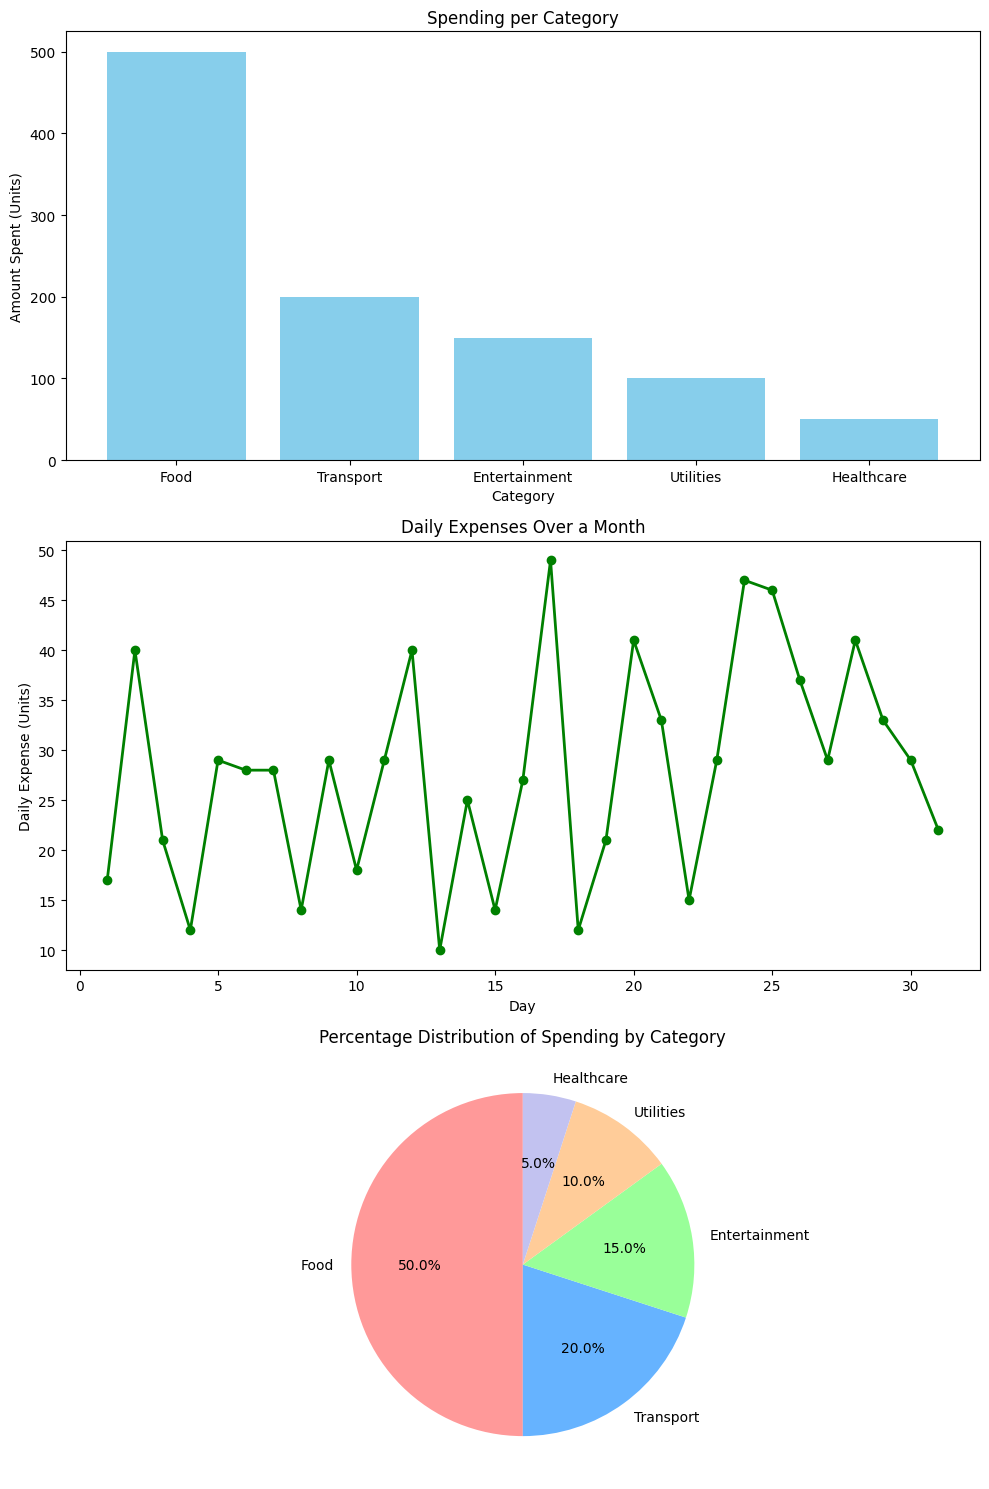

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: categories and expenses (values are in arbitrary units)
categories = ['Food', 'Transport', 'Entertainment', 'Utilities', 'Healthcare']
spending_by_category = [500, 200, 150, 100, 50]

# Assuming you have daily expenses for a month (31 days)
daily_expenses = np.random.randint(10, 50, 31)  # Random daily expenses between 10 and 50 units

# Generate Dates (1 to 31)
days = np.arange(1, 32)

# Create a figure and axes for subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Bar Chart: Spending per Category
axs[0].bar(categories, spending_by_category, color='skyblue')
axs[0].set_title('Spending per Category')
axs[0].set_ylabel('Amount Spent (Units)')
axs[0].set_xlabel('Category')

# Line Chart: Daily Expenses over a Month
axs[1].plot(days, daily_expenses, marker='o', color='green', linestyle='-', linewidth=2)
axs[1].set_title('Daily Expenses Over a Month')
axs[1].set_xlabel('Day')
axs[1].set_ylabel('Daily Expense (Units)')

# Pie Chart: Percentage Distribution of Spending by Category
axs[2].pie(spending_by_category, labels=categories, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
axs[2].set_title('Percentage Distribution of Spending by Category')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import numpy as np

# Sample data: categories and expenses (values are in arbitrary units)
categories = ['Food', 'Transport', 'Entertainment', 'Utilities', 'Healthcare']
spending_by_category = [500, 200, 150, 100, 50]  # Example of expenses per category

# Set a monthly budget
monthly_budget = 1000

# Function to check if spending exceeds the budget
def check_budget(spending_by_category, monthly_budget):
    total_spent = sum(spending_by_category)
    print(f"Total spending for the month: {total_spent} units.")

    if total_spent > monthly_budget:
        print(f"Warning! You have exceeded your monthly budget of {monthly_budget} units.")

        # Find categories that exceeded their individual budgets
        category_budgets = [monthly_budget / len(spending_by_category)] * len(spending_by_category)
        over_budget_categories = [
            (categories[i], spending_by_category[i] - category_budgets[i])
            for i in range(len(spending_by_category))
            if spending_by_category[i] > category_budgets[i]
        ]

        if over_budget_categories:
            print("\nOver-budget categories:")
            for category, over_amount in over_budget_categories:
                print(f"{category}: Over by {over_amount} units")
    else:
        print(f"You are within your budget of {monthly_budget} units.")

# Call the function to check the budget
check_budget(spending_by_category, monthly_budget)


Total spending for the month: 1000 units.
You are within your budget of 1000 units.


In [ ]:
import csv
import re
import os
import numpy as np
from datetime import datetime

# Predefined categories
valid_categories = ['Food', 'Transport', 'Entertainment', 'Utilities', 'Others']

# Validate date input using regular expressions
def validate_date(date_input):
    date_pattern = r'^\d{4}-\d{2}-\d{2}$'  # YYYY-MM-DD format
    if re.match(date_pattern, date_input):
        try:
            # Try to parse the date to ensure it's valid
            datetime.strptime(date_input, '%Y-%m-%d')
            return True
        except ValueError:
            print("Invalid date. Please enter a valid date in the format YYYY-MM-DD.")
            return False
    else:
        print("Invalid date format. Please enter the date in the format YYYY-MM-DD.")
        return False

# Function to input and validate expenses
def get_expense_for_category():
    while True:
        # Get user input for category and expense
        category = input(f"Enter a category ({', '.join(valid_categories)}): ").capitalize()

        # Validate category input
        if category not in valid_categories:
            print("Invalid category. Please select a valid category.")
            continue

        try:
            expense = float(input(f"Enter the expense amount for {category}: "))
            if expense < 0:
                print("Expense amount must be positive. Please try again.")
                continue
            return category, expense
        except ValueError:
            print("Invalid amount. Please enter a numerical value for the expense.")

# Function to save expenses to a CSV file
def save_expenses_to_csv(categories, spending_by_category, filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Category', 'Amount Spent'])
        for i, category in enumerate(categories):
            writer.writerow([category, spending_by_category[i]])
    print(f"Expenses saved to {filename}.")

# Function to export summary report to a CSV file
def export_summary_report(categories, spending_by_category, filename):
    total_spent = sum(spending_by_category)
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Category', 'Amount Spent'])
        for i, category in enumerate(categories):
            writer.writerow([category, spending_by_category[i]])
        writer.writerow(['Total', total_spent])
    print(f"Summary report exported to {filename}.")

# Function to check if spending exceeds the budget and alert the user
def check_budget(spending_by_category, categories, monthly_budget):
    total_spent = sum(spending_by_category)
    print(f"\nTotal spending for the month: {total_spent} units.")

    if total_spent > monthly_budget:
        print(f"Warning! You have exceeded your monthly budget of {monthly_budget} units.")

        # Find categories that exceeded their individual budgets
        category_budgets = [monthly_budget / len(spending_by_category)] * len(spending_by_category)
        over_budget_categories = [
            (categories[i], spending_by_category[i] - category_budgets[i])
            for i in range(len(spending_by_category))
            if spending_by_category[i] > category_budgets[i]
        ]

        if over_budget_categories:
            print("\nOver-budget categories:")
            for category, over_amount in over_budget_categories:
                print(f"{category}: Over by {over_amount} units")
    else:
        print(f"You are within your budget of {monthly_budget} units.")

# Set the monthly budget
monthly_budget = 1000

# Initialize categories and expenses
categories = valid_categories
spending_by_category = [0] * len(valid_categories)  # Start with zero spending in each category

# User inputs expenses for each category
print("Please enter your expenses for the month.")

# Loop to input expenses for all predefined categories
for i, category in enumerate(categories):
    print(f"\nCategory: {category}")
    category, expense = get_expense_for_category()

    # Update the expense for the selected category
    category_index = categories.index(category)
    spending_by_category[category_index] += expense

# Check if spending exceeds the budget
check_budget(spending_by_category, categories, monthly_budget)

# Prompt user for date and validate
while True:
    date_input = input("Enter the date of the transaction (YYYY-MM-DD): ")

    if validate_date(date_input):
        break

# Save expenses to CSV
file_name = "/content/2_Personal_Fitness_Tracker.csv"
save_expenses_to_csv(categories, spending_by_category, file_name)

# Export summary report to a new CSV
summary_report_filename = "monthly_summary_report.csv"
export_summary_report(categories, spending_by_category, summary_report_filename)


Please enter your expenses for the month.

Category: Food
Enter a category (Food, Transport, Entertainment, Utilities, Others): food
Enter the expense amount for Food: 150

Category: Transport
Enter a category (Food, Transport, Entertainment, Utilities, Others): transport
Enter the expense amount for Transport: 200

Category: Entertainment
Enter a category (Food, Transport, Entertainment, Utilities, Others): entertainment
Enter the expense amount for Entertainment: 70

Category: Utilities
Enter a category (Food, Transport, Entertainment, Utilities, Others): utilities
Enter the expense amount for Utilities: 60

Category: Others
Enter a category (Food, Transport, Entertainment, Utilities, Others): others
Enter the expense amount for Others: 40

Total spending for the month: 520.0 units.
You are within your budget of 1000 units.
Enter the date of the transaction (YYYY-MM-DD): 2025-01-23
Expenses saved to /content/2_Personal_Fitness_Tracker.csv.
Summary report exported to monthly_summary_r

In [ ]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import re
from datetime import datetime

# Predefined categories
valid_categories = ['Food', 'Transport', 'Entertainment', 'Utilities', 'Others']

# Initialize categories and expenses
categories = valid_categories
spending_by_category = [0] * len(valid_categories)  # Start with zero spending in each category
monthly_budget = 1000  # Default monthly budget

# Validate date input using regular expressions
def validate_date(date_input):
    date_pattern = r'^\d{4}-\d{2}-\d{2}$'  # YYYY-MM-DD format
    if re.match(date_pattern, date_input):
        try:
            # Try to parse the date to ensure it's valid
            datetime.strptime(date_input, '%Y-%m-%d')
            return True
        except ValueError:
            print("Invalid date. Please enter a valid date in the format YYYY-MM-DD.")
            return False
    else:
        print("Invalid date format. Please enter the date in the format YYYY-MM-DD.")
        return False

# Function to input and validate expenses
def get_expense_for_category():
    while True:
        # Get user input for category and expense
        category = input(f"Enter a category ({', '.join(valid_categories)}): ").capitalize()

        # Validate category input
        if category not in valid_categories:
            print("Invalid category. Please select a valid category.")
            continue

        try:
            expense = float(input(f"Enter the expense amount for {category}: "))
            if expense < 0:
                print("Expense amount must be positive. Please try again.")
                continue
            return category, expense
        except ValueError:
            print("Invalid amount. Please enter a numerical value for the expense.")

# Function to save expenses to a CSV file
def save_expenses_to_csv(filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Category', 'Amount Spent'])
        for i, category in enumerate(categories):
            writer.writerow([category, spending_by_category[i]])
    print(f"Expenses saved to {filename}.")

# Function to export summary report to a CSV file
def export_summary_report(filename):
    total_spent = sum(spending_by_category)
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Category', 'Amount Spent'])
        for i, category in enumerate(categories):
            writer.writerow([category, spending_by_category[i]])
        writer.writerow(['Total', total_spent])
    print(f"Summary report exported to {filename}.")

# Function to view total spending by category
def view_total_spending():
    print("\nTotal Spending by Category:")
    for i, category in enumerate(categories):
        print(f"{category}: {spending_by_category[i]} units")

# Function to visualize expense data using matplotlib
def visualize_expenses():
    fig, axs = plt.subplots(1, 1, figsize=(10, 6))
    axs.bar(categories, spending_by_category, color='skyblue')
    axs.set_title('Spending per Category')
    axs.set_xlabel('Category')
    axs.set_ylabel('Amount Spent (Units)')
    plt.show()

# Function to set or check the monthly budget
def set_or_check_budget():
    global monthly_budget
    print(f"Current monthly budget: {monthly_budget} units")
    choice = input("Do you want to update the budget? (y/n): ").lower()
    if choice == 'y':
        try:
            new_budget = float(input("Enter the new budget: "))
            if new_budget < 0:
                print("Budget must be a positive value.")
            else:
                monthly_budget = new_budget
                print(f"Budget updated to {monthly_budget} units.")
        except ValueError:
            print("Invalid value for the budget.")

# Function to check if spending exceeds the budget and alert the user
def check_budget():
    total_spent = sum(spending_by_category)
    print(f"\nTotal spending for the month: {total_spent} units.")

    if total_spent > monthly_budget:
        print(f"Warning! You have exceeded your monthly budget of {monthly_budget} units.")

        # Find categories that exceeded their individual budgets
        category_budgets = [monthly_budget / len(spending_by_category)] * len(spending_by_category)
        over_budget_categories = [
            (categories[i], spending_by_category[i] - category_budgets[i])
            for i in range(len(spending_by_category))
            if spending_by_category[i] > category_budgets[i]
        ]

        if over_budget_categories:
            print("\nOver-budget categories:")
            for category, over_amount in over_budget_categories:
                print(f"{category}: Over by {over_amount} units")
    else:
        print(f"You are within your budget of {monthly_budget} units.")

# Function to add, update, or delete an expense
def modify_expense():
    print("\nChoose an option:")
    print("1. Add Expense")
    print("2. Update Expense")
    print("3. Delete Expense")
    choice = input("Enter your choice (1/2/3): ")

    if choice == '1':
        category, expense = get_expense_for_category()
        category_index = categories.index(category)
        spending_by_category[category_index] += expense
        print(f"Added {expense} units to {category}.")
    elif choice == '2':
        category = input(f"Enter the category to update ({', '.join(valid_categories)}): ").capitalize()
        if category in valid_categories:
            try:
                current_expense = spending_by_category[categories.index(category)]
                print(f"Current expense in {category}: {current_expense} units.")
                new_expense = float(input(f"Enter the new amount for {category}: "))
                if new_expense < 0:
                    print("Expense cannot be negative.")
                else:
                    spending_by_category[categories.index(category)] = new_expense
                    print(f"Updated {category} to {new_expense} units.")
            except ValueError:
                print("Invalid input. Please enter a valid number.")
        else:
            print("Invalid category.")
    elif choice == '3':
        category = input(f"Enter the category to delete ({', '.join(valid_categories)}): ").capitalize()
        if category in valid_categories:
            spending_by_category[categories.index(category)] = 0
            print(f"Deleted all expenses for {category}.")
        else:
            print("Invalid category.")
    else:
        print("Invalid choice.")

# Main menu loop
def main():
    while True:
        print("\n--- Budgeting Program ---")
        print("1. Add, Update, or Delete an Expense")
        print("2. View Total Spending by Category")
        print("3. Visualize Expense Data")
        print("4. Set and Check Monthly Budget")
        print("5. Export Summary Report")
        print("6. Exit")

        choice = input("Enter your choice (1-6): ")

        if choice == '1':
            modify_expense()
        elif choice == '2':
            view_total_spending()
        elif choice == '3':
            visualize_expenses()
        elif choice == '4':
            set_or_check_budget()
        elif choice == '5':
            summary_report_filename = "monthly_summary_report.csv"
            export_summary_report(summary_report_filename)
        elif choice == '6':
            print("Exiting the program.")
            break
        else:
            print("Invalid choice, please try again.")

# Run the program
if __name__ == '__main__':
    main()



--- Budgeting Program ---
1. Add, Update, or Delete an Expense
2. View Total Spending by Category
3. Visualize Expense Data
4. Set and Check Monthly Budget
5. Export Summary Report
6. Exit
Enter your choice (1-6): 4
Current monthly budget: 1000 units
Do you want to update the budget? (y/n): n

--- Budgeting Program ---
1. Add, Update, or Delete an Expense
2. View Total Spending by Category
3. Visualize Expense Data
4. Set and Check Monthly Budget
5. Export Summary Report
6. Exit
Enter your choice (1-6): 1

Choose an option:
1. Add Expense
2. Update Expense
3. Delete Expense
Enter your choice (1/2/3): 1
Enter a category (Food, Transport, Entertainment, Utilities, Others): food
Enter the expense amount for Food: 40
Added 40.0 units to Food.

--- Budgeting Program ---
1. Add, Update, or Delete an Expense
2. View Total Spending by Category
3. Visualize Expense Data
4. Set and Check Monthly Budget
5. Export Summary Report
6. Exit
Enter your choice (1-6): 1

Choose an option:
1. Add Expense